<a href="https://colab.research.google.com/github/phionex2/Deep-Learning/blob/main/Preceptron_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

x , y =make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [ ]:
x

In [ ]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
np.insert(x,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

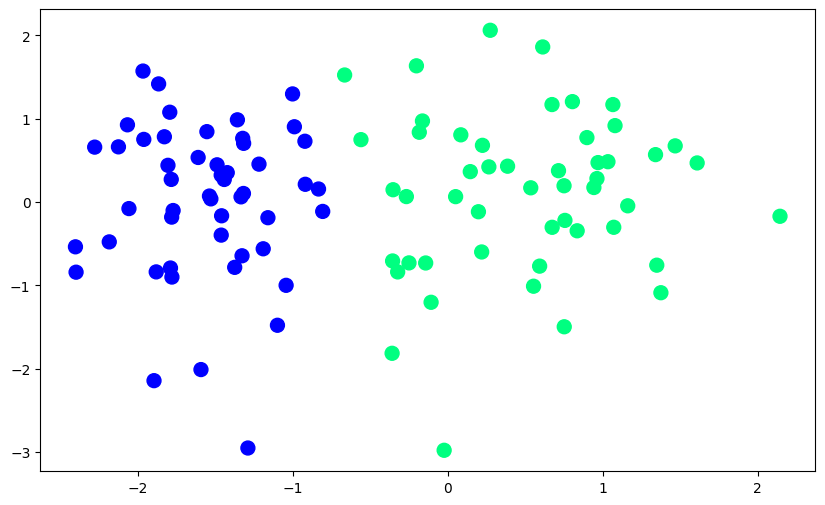

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter' ,s=100)

In [ ]:
def perceptron(x,y):
  x = np.insert(x,0,1,axis=1)
  weights = np.ones(x.shape[1])
  lr = 0.01#learning rate
  for i in range(1000):
    j = np.random.randint(0,100)#randomly select the point since i have data of 100
    y_hat = step(np.dot(x[j],weights))#model predict whether the point is place dor not
    weights = weights + lr*(y[j]-y_hat)*x[j]#coefficient find
  return weights[0],weights[1:]

In [ ]:
def step(z):#outcome of step function
  return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(x,y)

In [ ]:
print(coef_)#value of w1 and w2
print(intercept_)#value of Wo

[1.27990079 0.28032153]
0.95


In [ ]:
m = -(coef_[0]/coef_[1])#find the value of m= - A/b
b = -(intercept_/coef_[1])#find the value of c = -C/B

In [ ]:

x_input = np.linspace(-5,5,100)
y_input = m*x_input + b

(-3.0, 2.0)

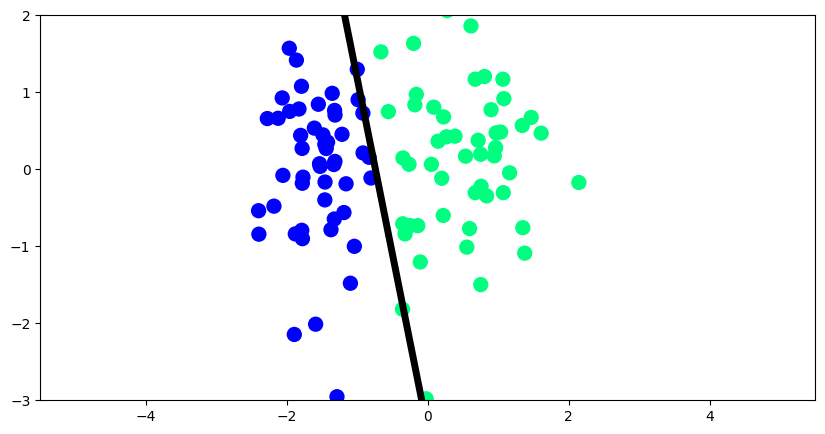

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x_input,y_input,color='Black',linewidth=5)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
#Animation
def perceptron(x,y):
  m=[]
  b=[]
  x = np.insert(x,0,1,axis=1)
  weights = np.ones(x.shape[1])
  lr =0.01
  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(x[j],weights))
    weights = weights + lr*(y[j]-y_hat)*x[j]

    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))
  return m,b

In [ ]:
m,b = perceptron(x,y)

In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [ ]:
fig, ax = plt.subplots(figsize=(9,2))
x_i  = np.arange(-3 ,3,0.01)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] + b[0] , 'r-' , linewidth = 5)
plt.ylim(-3,3)
def update(i):
  label = 'epoch {0}'.format(i + 1)
  line.set_ydata(x_i*m[i] + b[i])
  ax.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>